In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib notebook
# %matplotlib ipympl % visual studio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
def f2(x,y):
    return x**4 + y**4 - 2*(x-y)**2
    #return 14*x**2 - 2*x**3 + 2*y**2 + 4*x*y

In [3]:
Dx = lambda f,x,y,h=1e-5: (f(x+h,y) - f(x-h,y))/(2*h)
Dy = lambda f,x,y,h=1e-5: (f(x,y+h) - f(x,y-h))/(2*h)

In [4]:
x0, y0 = 0.5,0.1

In [5]:
Gradient = lambda f,x,y: np.array([Dx(f,x,y),Dy(f,x,y)])
Gradient(f2,x0,y0)

array([-1.1  ,  1.604])

In [12]:
def Minimizer(f, N = 100, gamma = 0.01):
    
    r = np.zeros((N,2))
    r[0] = np.random.uniform(-5.,5.,size=2)
    
    Grad = np.zeros((N,2))
    Grad[0] = Gradient(f,r[0,0],r[0,1])
    
    # We save the gradient in each step

    for i in tqdm(range(1,N)):
        r[i] = r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1])
        Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])
        
        
    return r,Grad

In [13]:
N = 200
r,Grad = Minimizer(f2,N)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 37445.78it/s]


In [14]:
r[-1]

array([-1.41421356,  1.41421356])

<IPython.core.display.Javascript object>


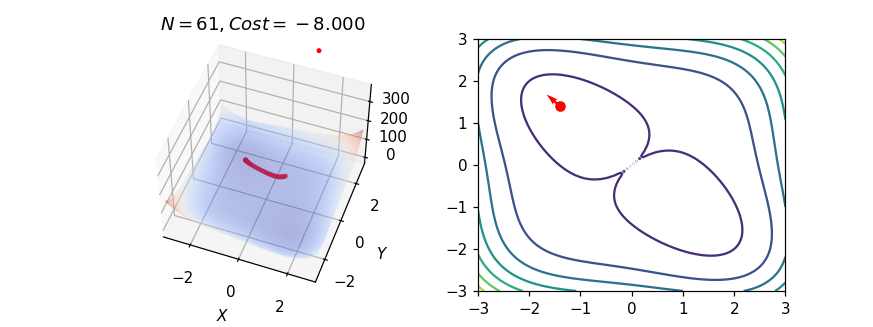

In [15]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,2,1, projection = '3d',elev = 50, azim = -70)
ax1 = fig.add_subplot(1,2,2)

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)

def init():
    
    ax.set_xlim3d(x[0],x[-1])
    ax.set_ylim3d(y[0],y[-1])
    ax.set_xlabel(r'$X$')
    ax.set_ylabel(r'$Y$')
    
def Update(i):
    
    ax.clear()
    ax1.clear()
    init()
    
    ax.set_title(r'$N=%.0f, Cost=%.3f$'%(i,f2(r[i,0],r[i,1])))
    ax.plot_surface(X,Y,Z, cmap = 'coolwarm', alpha=0.4)
    ax.scatter(r[:i,0],r[:i,1],f2(r[:i,0],r[:i,1]),marker='.',color='r')
    
    ax1.contour(X,Y,f2(X,Y))
    ax1.scatter(r[i,0],r[i,1],color='r') 
    ax1.quiver(r[i,0],r[i,1],-Grad[i,0],-Grad[i,1],color='r')


Animation = animation.FuncAnimation(fig, Update, frames=N,init_func=init)

In [16]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800 )
#Animation.save( 'Gradient2D.mp4', writer=writer )

In [11]:
# Cuando tiene argumentos animation
#e = 1
#Animation = animation.FuncAnimation(fig, animate, frames=Nframes, fargs=(e,),init_func=init)